In [1]:
import sys
sys.path.insert(0, './evaluate')
import evaluate
#evaluate.evaluate("input prediction file name", "desire output csv file name")
evaluate.evaluate('./data/test_predion.txt', './output_file.csv')

End Evalutation


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (224, 224, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [12]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# include_top=True，表示會載入完整的 VGG16 模型，包括加在最後3層的卷積層
# include_top=False，表示會載入 VGG16 的模型，不包括加在最後3層的卷積層，通常是取得 Features
# 若下載失敗，請先刪除 c:\<使用者>\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5
model = VGG16(weights='imagenet', include_top=True) 

# Input：要辨識的影像
img_path = 'tiger.jpg'
#img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測，取得features，維度為 (1,7,7,512)
features = model.predict(x)
# 取得前三個最可能的類別及機率
print('Predicted:', decode_predictions(features, top=3)[0])

 41639936/553467096 [=>............................] - ETA: 30:18

KeyboardInterrupt: 

In [78]:
import skimage.data
import selectivesearch

# img = skimage.data.astronaut()
img = np.array(Image.open('test.jpg'), dtype=np.uint8)
img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0.9, min_size=10)


In [72]:
# x,y,w,h = regions[:10][0]['rect']

print(regions[:10][1]['rect'])

(0, 0, 61, 144)


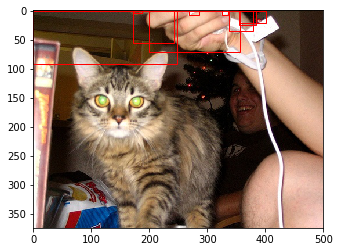

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('test.jpg'), dtype=np.uint8)
# im = img
fig,ax = plt.subplots(1)
ax.imshow(im)
roi = regions[:10]
for i in range(len(roi)):
    x,y,w,h = roi[:len(roi)][i]['rect']
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

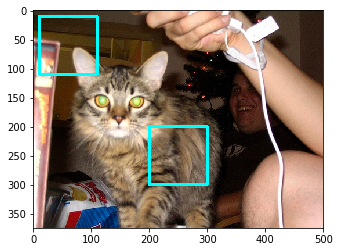

In [86]:
def plot_bbox(img,coord):
    for i in range(len(coord)):
        x,y,w,h = coord[i]
        cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 255), 3)
    plt.imshow(img)
im = np.array(Image.open('test.jpg'), dtype=np.uint8)
test_coord = [[10,10,100,100],[200,200,100,100]]
plot_bbox(im,test_coord)